In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

df = pd.read_csv("housing.csv")

df["total_bedrooms"]=df["total_bedrooms"].fillna(df["total_bedrooms"].mean())
df.isna().sum()

x = df.drop("median_house_value",axis=1)
y = df["median_house_value"]
onehot=OneHotEncoder()
trans=ColumnTransformer([("onehot",onehot,["ocean_proximity"])],remainder="passthrough")
trans_x=pd.DataFrame(trans.fit_transform(x))

In [3]:
scaler = StandardScaler()
x = scaler.fit_transform(trans_x)
x = np.c_[np.ones(x.shape[0]), x]
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.0,-0.891156,-0.681889,-0.015566,2.830742,-0.384466,-1.327835,1.052548,0.982143,-0.804819,-0.975228,-0.974429,-0.977033,2.344766
1,1.0,-0.891156,-0.681889,-0.015566,2.830742,-0.384466,-1.322844,1.043185,-0.607019,2.045890,1.355088,0.861439,1.669961,2.332238
2,1.0,-0.891156,-0.681889,-0.015566,2.830742,-0.384466,-1.332827,1.038503,1.856182,-0.535746,-0.829732,-0.820777,-0.843637,1.782699
3,1.0,-0.891156,-0.681889,-0.015566,2.830742,-0.384466,-1.337818,1.038503,1.856182,-0.624215,-0.722399,-0.766028,-0.733781,0.932968
4,1.0,-0.891156,-0.681889,-0.015566,2.830742,-0.384466,-1.337818,1.038503,1.856182,-0.462404,-0.615066,-0.759847,-0.629157,-0.012881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,1.0,-0.891156,1.466514,-0.015566,-0.353264,-0.384466,-0.758826,1.801647,-0.289187,-0.444985,-0.390860,-0.512592,-0.443449,-1.216128
20636,1.0,-0.891156,1.466514,-0.015566,-0.353264,-0.384466,-0.818722,1.806329,-0.845393,-0.888704,-0.925139,-0.944405,-1.008420,-0.691593
20637,1.0,-0.891156,1.466514,-0.015566,-0.353264,-0.384466,-0.823713,1.778237,-0.924851,-0.174995,-0.126106,-0.369537,-0.174042,-1.142593
20638,1.0,-0.891156,1.466514,-0.015566,-0.353264,-0.384466,-0.873626,1.778237,-0.845393,-0.355600,-0.307379,-0.604429,-0.393753,-1.054583


In [4]:
alpha = 0.0001
epochs = 50000
x_train, x_test , y_train, y_test = train_test_split(x,y,test_size=0.25)
theta = np.random.randn(x_train.shape[1])
pd.DataFrame(x_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.0,1.122138,-0.681889,-0.015566,-0.353264,-0.384466,-1.228009,0.724818,-1.481058,-1.111022,-1.192279,-1.189894,-1.251672,1.153572
1,1.0,1.122138,-0.681889,-0.015566,-0.353264,-0.384466,-0.519243,-0.244329,-1.401600,0.502959,0.699165,0.365163,0.626334,-0.297125
2,1.0,-0.891156,-0.681889,-0.015566,-0.353264,2.601007,1.157836,-1.250930,-0.845393,0.979682,0.489270,0.480843,0.566175,1.447133
3,1.0,-0.891156,-0.681889,-0.015566,2.830742,-0.384466,-1.332827,1.024457,1.856182,0.471789,-0.049780,0.039316,0.053516,1.202420
4,1.0,-0.891156,-0.681889,-0.015566,-0.353264,2.601007,-1.437644,0.972957,1.697265,-0.547664,-0.607911,-0.235313,-0.558536,0.353215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15475,1.0,-0.891156,-0.681889,-0.015566,-0.353264,2.601007,0.603801,-0.857653,0.743768,-0.037938,-0.328845,-0.338630,-0.278666,1.633629
15476,1.0,-0.891156,-0.681889,-0.015566,-0.353264,2.601007,-1.372757,0.884001,-0.924851,1.837782,1.183356,0.999195,1.392707,1.325698
15477,1.0,1.122138,-0.681889,-0.015566,-0.353264,-0.384466,0.933227,-1.012154,-0.607019,-0.196081,-0.009232,-0.002187,-0.045877,-0.146949
15478,1.0,-0.891156,-0.681889,-0.015566,-0.353264,2.601007,1.237697,-1.400749,-0.765935,-0.029687,0.603758,-0.194693,0.741421,-1.184704


In [5]:
%%time

def gradient_descent(x_train, y_train, theta, alpha, epochs):
  m = len(y_train)
  errors = []
  for i in range(epochs):  
    predictions = x_train.dot(theta)    
    error = (1/m) * np.sum((predictions - y_train) ** 2)
    errors.append(error)    
    gradient = (2/m) * x_train.T.dot(x_train.dot(theta) - y_train)
    theta = theta - alpha * gradient
  return theta, errors

theta, errors = gradient_descent(x_train, y_train, theta, alpha, epochs)
theta

CPU times: user 8.57 s, sys: 70.8 ms, total: 8.64 s
Wall time: 8.64 s


array([207047.18974913,   9007.86234051, -21580.86874025,   2533.58752417,
         7195.79331403,   9766.71300127, -16894.83295046, -15774.65173917,
        14281.35329514,   4193.07621438,  17776.94268581, -32599.80160215,
        17090.59906139,  71260.71892392])

In [6]:
predictions = x_test.dot(theta)

compdf = pd.DataFrame(y_test)
compdf["Predicted"] = predictions
compdf

,median_house_value,Predicted
6461,257100.0,239710.365264
10606,192200.0,253974.512623
6034,135000.0,158090.134449
529,197900.0,273956.093346
17406,120600.0,214418.906096
...,...,...
10213,215400.0,257189.205836
17689,166100.0,219293.266526
20057,53300.0,42210.677113
17619,278100.0,285086.523169


In [7]:
print(f"R2 Score : {r2_score(y_test, predictions)}")

R2 Score : 0.6316295764588891


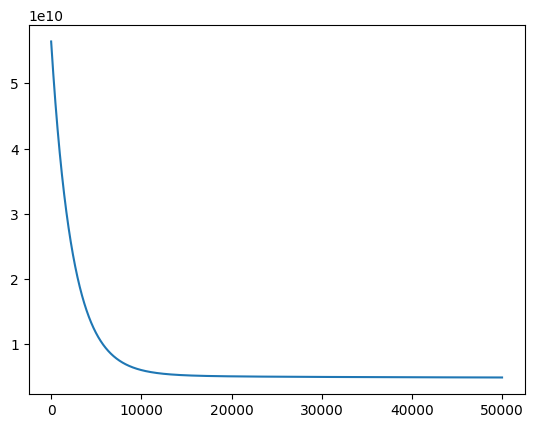

In [8]:
from matplotlib import pyplot as plt
plt.plot(errors)